In [7]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d
import sys
sys.path.append('../')
import paraPropPython as ppp

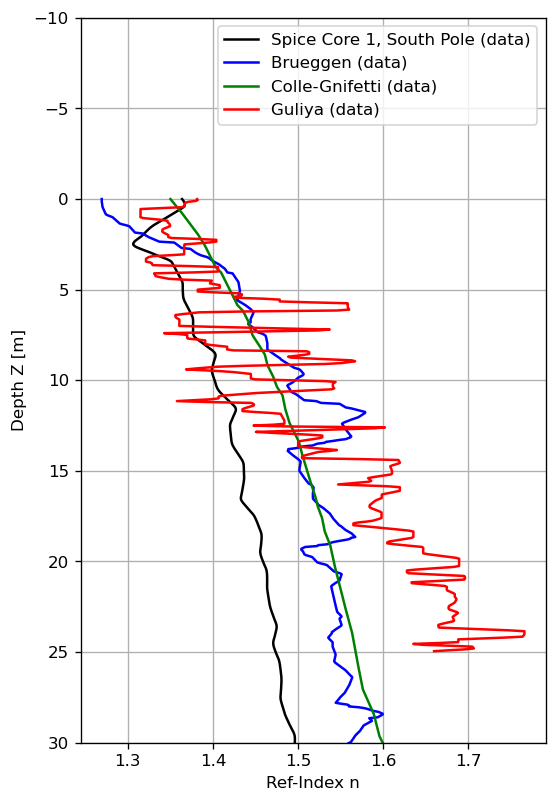

In [32]:
def get_profile_from_file(fname):
    prof_data = np.genfromtxt(fname)
    z_prof = prof_data[:,0]
    n_prof = prof_data[:,1]
    return n_prof, z_prof

n_spice, z_spice = get_profile_from_file('spice2019_indOfRef_core1_5cm.txt')
n_brueggen, z_brueggen = get_profile_from_file('brueggen.txt')
n_guliya, z_guliya = get_profile_from_file('guliya.txt')
n_cg, z_cg = get_profile_from_file('colle-gnifetti.txt')
n_aletsch, z_aletsch = get_profile_from_file('aletsch_0604_max_peak_15m.txt')

'''
sim1 = ppp.paraProp(iceLength=50, iceDepth=100, airHeight=10,dx=1, dz=0.05)
sim2 = ppp.paraProp(iceLength=50, iceDepth=100, airHeight=10,dx=1, dz=0.05)
sim3 = ppp.paraProp(iceLength=50, iceDepth=100, airHeight=10,dx=1, dz=0.05)

sim1.set_n(nVec=n_spice, zVec=z_spice)
sim2.set_n(nVec=n_brueggen, zVec=z_brueggen)
sim3.set_n(nVec=n_guliya, zVec=z_guliya)
'''
fig = pl.figure(figsize=(5,8),dpi=120)
ax = fig.add_subplot(111)

ax.plot(n_spice, z_spice, c='k', label='Spice Core 1, South Pole (data)')
#ax.plot(sim1.get_n(x=0), sim1.z, '--', c='k', label='Spice Core 1, South Pole (in paraProp)')

ax.plot(n_brueggen, z_brueggen, c='b',label='Brueggen (data)')
#ax.plot(sim2.get_n(x=0), sim2.z, '--', c='b',label='Brueggen (in paraProp)')
ax.plot(n_cg, z_cg, c='g',label='Colle-Gnifetti (data)')

ax.plot(n_guliya, z_guliya, c='r',label='Guliya (data)')

#ax.plot(n_aletsch, z_aletsch, c='g',label='Aletsch Glacier (data, prelim)')
#ax.plot(sim3.get_n(x=0), sim3.z, '--', c='r',label='Guliya (in paraProp)')
#ax.axvline(1.0,color='k',linestyle='--',label='Vacuum/Air')
#ax.axvline(1.78,color='b',linestyle='--',label='Ice')
ax.grid()
ax.set_ylabel('Depth Z [m]')
ax.set_xlabel('Ref-Index n')
ax.set_ylim(30, -10)
ax.legend()
fig.savefig('ref_index.png')
pl.show()